# **Índice de Sentimento V1**

## *Sentimentos*

In [19]:
import pandas as pd

sent = pd.read_csv('./data/news/noticias_mercado financeiro_sentimentos.csv')
sent['Data'] = pd.to_datetime(sent['Data'], format='%Y-%m-%d')
sent.loc[sent['Sentimento'] == 'POSITIVE', 'Score Signal'] = sent.loc[sent['Sentimento'] == 'POSITIVE', 'Score']
sent.loc[sent['Sentimento'] == 'NEGATIVE', 'Score Signal'] = sent.loc[sent['Sentimento'] == 'NEGATIVE', 'Score'] * -1
sent.loc[sent['Sentimento'] == 'NEUTRAL', 'Score Signal'] = 0
sent

,Data,Notícia,Sentimento,Score,Score Signal
0,2024-09-03,Unipar e MELVER estão com inscrições abertas p...,NEUTRAL,0.700441,0.000000
1,2024-09-03,Mercado financeiro hoje: Vale (VALE3) em busca...,NEGATIVE,0.515265,-0.515265
2,2024-09-03,Briga entre X e STF pode afastar investidores ...,NEGATIVE,0.850306,-0.850306
3,2024-09-03,Podcast | Fechamento de Mercado - 03/09/2024,NEUTRAL,0.614209,0.000000
4,2024-09-03,Comentario semanal - Perspectivas,NEUTRAL,0.610426,0.000000
...,...,...,...,...,...
30477,2014-09-08,Meu salário é de R$ 20 mil; como investir para...,NEUTRAL,0.717937,0.000000
30478,2014-09-08,» AMAZONAS ATUAL - Cartões pré-pagos avançam n...,POSITIVE,0.697899,0.697899
30479,2014-09-08,Loja de roupas para executivas fatura R$ 600 m...,POSITIVE,0.721196,0.721196
30480,2014-09-08,Investir em obras de arte é opção para quem já...,NEUTRAL,0.653174,0.000000


In [7]:
### Código antigo Guigas ###

# sentimentos_g = []
# sentimentos_t = []
# for data in sent['Data'].unique():
#     dia = sent[sent['Data'] == data]
#     if dia['Sentimento'].value_counts().shape[0] != 1:
#         total_dia_g = dia[dia['Sentimento'] != 'NEUTRAL']['Score'].sum() + dia[dia['Sentimento'] == 'NEUTRAL']['Score'].sum() * 0.5
#         total_dia_t = len(dia[dia['Sentimento'] != 'NEUTRAL']) + len(dia[dia['Sentimento'] == 'NEUTRAL']) * 0.5
#         soma_dia = dia['Score Signal'].sum()
#         sentimentos_g.append(soma_dia/total_dia_g)
#         sentimentos_t.append(soma_dia/total_dia_t)
#     else:
#         media = dia['Score Signal'].mean()
#         sentimentos_g.append(media)
#         sentimentos_t.append(media)

In [20]:
import numpy as np
import pandas as pd

# Código Cálculo de Sentimentos
def agg_score(group):
    if group['Sentimento'].nunique() > 1:
        signal = group['Score Signal'].sum() / group['Score Modificado'].sum()
        return signal
    else:
        return group['Score Signal'].mean()

sent['Score Modificado'] = np.where(sent['Sentimento'] == "NEUTRAL", 0.5, 1) * sent['Score']
sentimentos_df = sent.resample('W', on='Data').apply(agg_score).to_frame(name='Signal')

sentimentos_df.describe()

,Signal
count,522.000000
mean,-0.198012
std,0.192318
min,-0.647943
25%,-0.327436
50%,-0.200970
75%,-0.067929
max,0.400193


c:\Users\Andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[*********************100%%**********************]  1 of 1 completed


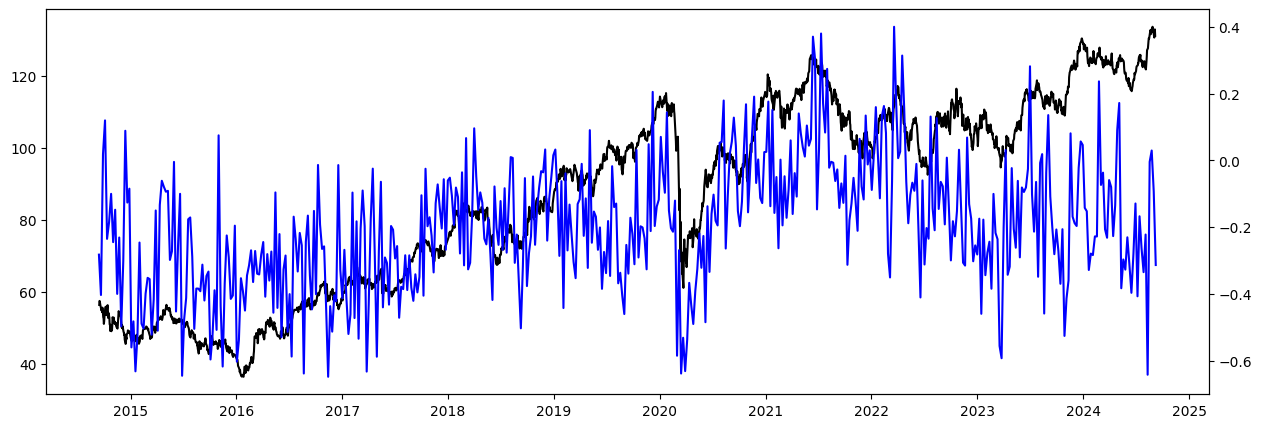

In [23]:
import matplotlib.pyplot as plt
import yfinance as yf

ticker = 'BOVA11.SA'

dados = yf.download(ticker, start=min(sentimentos_df.index), end=max(sentimentos_df.index))['Adj Close']

fig, ax = plt.subplots(figsize=(15, 5))

ax2 = ax.twinx()
ax.plot(dados, color='black')
ax2.plot(sentimentos_df['Signal'], color='blue')

plt.show()

In [25]:
dados_agg = dados.resample('W').mean()
df_dados = dados_agg.to_frame().merge(sentimentos_df, left_on='Date', right_on='Data', how='left')
df_dados['Signal'].corr(df_dados['Adj Close'])

0.48001139975000406

In [3]:
sentimentos_df = pd.DataFrame(sentimentos_g, index=sent['Data'].unique())
sentimentos_df.columns = ['Sentimento Guigas']
sentimentos_df['Sentimento Theozão'] = sentimentos_t
sentimentos_df.describe()

,Sentimento Guigas,Sentimento Theozão
count,3637.000000,3637.000000
mean,-0.186246,-0.135754
std,0.363518,0.260218
min,-0.953159,-0.837898
25%,-0.450010,-0.314190
50%,-0.206619,-0.140980
75%,0.049112,0.031827
max,0.948822,0.775933


## *Índice de Sentimento*

In [51]:
vix = pd.read_excel('./data/vix/PerformanceGraphExport.xls')
vix

,Effective date,S&P/B3 Ibovespa VIX
0,2021-08-23,25.17
1,2021-08-24,22.89
2,2021-08-25,22.85
3,2021-08-26,23.23
4,2021-08-27,23.07
...,...,...
744,2024-08-15,14.46
745,2024-08-16,15.68
746,2024-08-19,16.07
747,2024-08-20,15.70
